In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd

sys.path.append('/home/nfs/sdunin/scr/rossmann-toolbox')
from rossmann_toolbox import RossmannToolbox
rt = RossmannToolbox()

sys.path.append('/home/nfs/sdunin/scr/lbs-tools/lbs')
from kegg import kegg
kegg.configure(cachedir='/home/users/sdunin/calc/rossmann_pathways/cache',
               verbose=False)


Using backend: pytorch


/home/nfs/sdunin/scr/rossmann-toolbox/rossmann_toolbox/rtb.py:66 - FoldX binary location was not provided. The structure-based prediction functionality will be disabled.
/home/nfs/sdunin/scr/rossmann-toolbox/rossmann_toolbox/rtb.py:75 - HHpred path was not provided. The HHsearch-based prediction of Rossmann cores won't be available
/home/nfs/sdunin/scr/rossmann-toolbox/rossmann_toolbox/rtb.py:83 - DSSP binary location was not provided. The structure-based prediction functionality will be disabled.
function get_genes has been configured
function get_kos has been configured
function get_organisms has been configured
function get_pathways has been configured
function get_seq has been configured


In [3]:
organisms = kegg.get_organisms()
prokaryotes_codes = [organism[1] for organism in organisms if 'Prokaryotes' in organism[-1]]

In [4]:
len(prokaryotes_codes)

6721

In [7]:
# https://www.kegg.jp/kegg/rest/keggapi.html
# ncbi - reference - convert to kegg

ref_genomes = []

f = open('./data/kegg_ref_genomes.txt')
for l in f.readlines():
    if l.find('*')==-1: continue
    ls = l.strip().split(' ')
    code = ls[1]
    if code!='':
        ref_genomes.append(code)
f.close()

In [8]:
len(ref_genomes)

15

In [7]:
pathways = kegg.get_pathways()

In [8]:
path2ko_and_genes = {}

for path_id, path_name in pathways:
    """
     map Reference pathway
     ko  Reference pathway (KO only)
     ec  Reference pathway (EC only)
     rn  Reference pathway (Reaction only)
    """
    path_id = path_id.replace('path:map', 'path:ko')
    kos = kegg.get_kos(path_id)
    kos = kegg.fix(kos)
    
    print(path_id, 'contains', len(kos), 'KO')
    
    ko2genes = {}
    count = 1
    for _, ko in kos:
        print(count, '/', len(kos), end='')
        count += 1
        print('\t', ko)
        genes = kegg.get_genes(ko)
        genes = kegg.fix(genes)
        genes = [i[1].split(':') for i in genes]
        
        genes_df = pd.DataFrame(genes, columns=['genome', 'gene_id'])
        genes_df = genes_df[genes_df.genome.apply(lambda x:x in prokaryotes_codes)]
        org2genes = dict([(g[0], g[1].gene_id.tolist()) for g in genes_df.groupby('genome')])
        
        assert not ko in ko2genes
        ko2genes[ko] = org2genes
        
    path2ko_and_genes[path_id] = pd.DataFrame.from_dict(ko2genes)
    break

print('done!')

path:ko00010 contains 106 KO
1 / 106	 ko:K00001
2 / 106	 ko:K00002
3 / 106	 ko:K00016
4 / 106	 ko:K00114
5 / 106	 ko:K00121
6 / 106	 ko:K00128
7 / 106	 ko:K00129
8 / 106	 ko:K00131
9 / 106	 ko:K00134
10 / 106	 ko:K00138
11 / 106	 ko:K00149
12 / 106	 ko:K00150
13 / 106	 ko:K00161
14 / 106	 ko:K00162
15 / 106	 ko:K00163
16 / 106	 ko:K00169
17 / 106	 ko:K00170
18 / 106	 ko:K00171
19 / 106	 ko:K00172
20 / 106	 ko:K00174
21 / 106	 ko:K00175
22 / 106	 ko:K00189
23 / 106	 ko:K00382
24 / 106	 ko:K00627
25 / 106	 ko:K00844
26 / 106	 ko:K00845
27 / 106	 ko:K00850
28 / 106	 ko:K00873
29 / 106	 ko:K00886
30 / 106	 ko:K00895
31 / 106	 ko:K00918
32 / 106	 ko:K00927
33 / 106	 ko:K01006
34 / 106	 ko:K01007
35 / 106	 ko:K01084
36 / 106	 ko:K01085
37 / 106	 ko:K01086
38 / 106	 ko:K01222
39 / 106	 ko:K01223
40 / 106	 ko:K01568
41 / 106	 ko:K01596
42 / 106	 ko:K01610
43 / 106	 ko:K01622
44 / 106	 ko:K01623
45 / 106	 ko:K01624
46 / 106	 ko:K01689
47 / 106	 ko:K01785
48 / 106	 ko:K01792
49 / 106	 ko:K01803


In [12]:
path2ko_and_genes['path:ko00010']

,ko:K00001,ko:K00002,ko:K00016,ko:K00114,ko:K00121,ko:K00128,ko:K00129,ko:K00131,ko:K00134,ko:K00138,...,ko:K18978,ko:K20118,ko:K20866,ko:K21071,ko:K22224,ko:K22473,ko:K22474,ko:K24012,ko:K24182,ko:K25026
aac,[Aaci_0920],NaN,[Aaci_0520],NaN,NaN,"[Aaci_1057, Aaci_0749, Aaci_0152]",NaN,NaN,[Aaci_2273],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Aaci_0886],NaN,[Aaci_0086]
aacn,[AANUM_0982],NaN,NaN,NaN,[AANUM_0855],NaN,NaN,NaN,[AANUM_0173],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aae,[aq_1240],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[aq_1065],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aagi,[NCTC2676_1_00235],NaN,NaN,NaN,NaN,[NCTC2676_1_00077],NaN,NaN,"[NCTC2676_1_01301, NCTC2676_1_01613]",[NCTC2676_1_02445],...,NaN,NaN,NaN,[NCTC2676_1_02360],NaN,NaN,NaN,NaN,NaN,[NCTC2676_1_01067]
aah,[CF65_00810],NaN,NaN,NaN,[CF65_01114],NaN,NaN,NaN,[CF65_02309],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eof,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hgn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ndl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bgw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
nan_percentages = {}
for col in path2ko_and_genes['path:ko00010']:
    perc = 100 * path2ko_and_genes['path:ko00010'][col].isnull().sum() / len(path2ko_and_genes['path:ko00010'])
    nan_percentages[col] = perc

In [18]:
def clean_df(df, max_nan_fraction):
    to_drop = [ko for ko in nan_percentages.keys() if nan_percentages[ko] > max_nan_fraction]
    print(to_drop)
    return df.drop(columns=to_drop)

In [24]:
clean_df(path2ko_and_genes['path:ko00010'], 20)

['ko:K00001', 'ko:K00002', 'ko:K00016', 'ko:K00114', 'ko:K00121', 'ko:K00128', 'ko:K00129', 'ko:K00131', 'ko:K00138', 'ko:K00149', 'ko:K00150', 'ko:K00161', 'ko:K00162', 'ko:K00163', 'ko:K00169', 'ko:K00170', 'ko:K00171', 'ko:K00172', 'ko:K00174', 'ko:K00175', 'ko:K00189', 'ko:K00844', 'ko:K00845', 'ko:K00850', 'ko:K00886', 'ko:K00895', 'ko:K00918', 'ko:K01006', 'ko:K01007', 'ko:K01084', 'ko:K01085', 'ko:K01086', 'ko:K01222', 'ko:K01223', 'ko:K01568', 'ko:K01596', 'ko:K01610', 'ko:K01622', 'ko:K01623', 'ko:K01624', 'ko:K01785', 'ko:K01792', 'ko:K01834', 'ko:K01835', 'ko:K01837', 'ko:K01895', 'ko:K01905', 'ko:K01913', 'ko:K02446', 'ko:K02753', 'ko:K02777', 'ko:K02779', 'ko:K02791', 'ko:K03103', 'ko:K03737', 'ko:K03841', 'ko:K04022', 'ko:K04041', 'ko:K04072', 'ko:K06859', 'ko:K08074', 'ko:K10705', 'ko:K11389', 'ko:K11532', 'ko:K11645', 'ko:K12406', 'ko:K12407', 'ko:K12957', 'ko:K13810', 'ko:K13951', 'ko:K13952', 'ko:K13953', 'ko:K13954', 'ko:K13979', 'ko:K13980', 'ko:K14028', 'ko:K14029'

,ko:K00134,ko:K00382,ko:K00627,ko:K00873,ko:K00927,ko:K01689,ko:K01803,ko:K01810
aac,[Aaci_2273],[Aaci_0454],[Aaci_0455],[Aaci_2352],[Aaci_0741],[Aaci_0744],[Aaci_0742],[Aaci_0085]
aacn,[AANUM_0173],[AANUM_2019],[AANUM_2020],[AANUM_1702],[AANUM_0607],[AANUM_0755],[AANUM_0490],[AANUM_1617]
aae,[aq_1065],[aq_736],NaN,NaN,[aq_118],[aq_484],[aq_360],NaN
aagi,"[NCTC2676_1_01301, NCTC2676_1_01613]",[NCTC2676_1_01119],[NCTC2676_1_01118],[NCTC2676_1_01267],[NCTC2676_1_01302],[NCTC2676_1_00732],[NCTC2676_1_01303],[NCTC2676_1_01308]
aah,[CF65_02309],[CF65_01988],[CF65_01986],[CF65_02214],[CF65_01437],[CF65_01020],[CF65_00190],[CF65_01624]
...,...,...,...,...,...,...,...,...
eof,NaN,NaN,NaN,NaN,NaN,NaN,[NARSGI1_01880],NaN
hgn,NaN,NaN,NaN,NaN,NaN,NaN,[E6W36_13575],[E6W36_05470]
ndl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bgw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
for path_id in path2ko_and_genes.keys():
    df = path2ko_and_genes[path_id]

In [28]:
org = 'eco'

seq_to_check = []

for idx, genes in df.loc[org].dropna().iteritems():
    for gene in genes:
        full_gene = org + ':' + gene
        gene_seq = kegg.get_seq(full_gene)
        seq_to_check.append((idx+"_"+gene, gene_seq))

seq_to_check = dict(seq_to_check)
bab_motifs = rt.seq_detect_cores(seq_to_check, mode='dl')


In [58]:

rossmann_kos = []

for item in bab_motifs.items():
    idx, pred = item
    if len(pred[0]) > 0:
        assert not idx in rossmann_kos
        rossmann_kos.append(idx)


In [59]:
rossmann_kos

['ko:K00121_b0356',
 'ko:K00134_b1779',
 'ko:K00382_b0116',
 'ko:K01222_b1734',
 'ko:K02446_b2930',
 'ko:K12957_b4269',
 'ko:K13953_b1478',
 'ko:K13979_b0325']

In [65]:
df['ko:K00134'].dropna()

aac                              [Aaci_2273]
aacn                            [AANUM_0173]
aae                                [aq_1065]
aagi    [NCTC2676_1_01301, NCTC2676_1_01613]
aah                             [CF65_02309]
                        ...                 
xfn                           [XfasM23_1718]
xfs                             [D934_08240]
xft                                [PD_1626]
xii                            [AMD24_00753]
xtw                            [AB672_09250]
Name: ko:K00134, Length: 6230, dtype: object

In [66]:
from Bio.KEGG import REST

In [73]:
REST.kegg_list('organism').read()

"T01001\thsa\tHomo sapiens (human)\tEukaryotes;Animals;Vertebrates;Mammals\nT01005\tptr\tPan troglodytes (chimpanzee)\tEukaryotes;Animals;Vertebrates;Mammals\nT02283\tpps\tPan paniscus (bonobo)\tEukaryotes;Animals;Vertebrates;Mammals\nT02442\tggo\tGorilla gorilla gorilla (western lowland gorilla)\tEukaryotes;Animals;Vertebrates;Mammals\nT01416\tpon\tPongo abelii (Sumatran orangutan)\tEukaryotes;Animals;Vertebrates;Mammals\nT03265\tnle\tNomascus leucogenys (northern white-cheeked gibbon)\tEukaryotes;Animals;Vertebrates;Mammals\nT01028\tmcc\tMacaca mulatta (rhesus monkey)\tEukaryotes;Animals;Vertebrates;Mammals\nT02918\tmcf\tMacaca fascicularis (crab-eating macaque)\tEukaryotes;Animals;Vertebrates;Mammals\nT04361\tcsab\tChlorocebus sabaeus (green monkey)\tEukaryotes;Animals;Vertebrates;Mammals\nT07242\tcaty\tCercocebus atys (sooty mangabey)\tEukaryotes;Animals;Vertebrates;Mammals\nT03989\trro\tRhinopithecus roxellana (golden snub-nosed monkey)\tEukaryotes;Animals;Vertebrates;Mammals\nT04

In [55]:
import matplotlib.pyplot as plt 

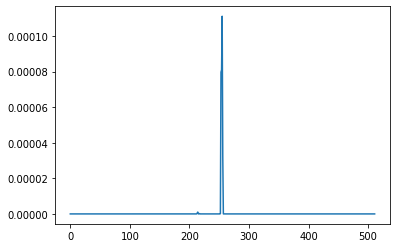

In [56]:
plt.plot(pred[1])